# Overview and Motivation

# Related Work

# Initial Questions

# Data

## Collection and Cleaning

In [88]:
# modules we'll use
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# read google play store apps data
googleDF = pd.read_csv("Data/googleplaystore.csv")

googleDF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

#### If we decided to drop all the missing values, we will be dropping 1481 rows which is corresponding to dropping 1481 apps. This approach is not suitable because we will be losing valuable data.

In [3]:
googleShape = googleDF.shape
missingData = googleShape[0] - googleDF.dropna().shape[0]
print(googleShape)
print(missingData)

(10841, 13)
1481


#### Counting the number of all missing values for each column

In [4]:
missing_values = googleDF.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### Each row should represent one app and therefore the number of unique apps should be equal to the number of rows.

In [5]:
googleDF.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

#### The number of rows exceeded the number of apps, and therefore there are duplicate values for the apps.
#### We will drop all duplicate rows.

In [6]:
# This is the number of duplicated apps.
print(googleDF.loc[googleDF['App'].duplicated(keep = 'first'), :].shape)

# new dataset with all duplicated apps dropped.
uniqueDF = googleDF.drop_duplicates(subset = ['App'], keep = 'first')

# Now the number rows matches the number of unique apps.
print(uniqueDF.shape)

# We reduced the number of missing values.
print(uniqueDF.isnull().sum())

(1181, 13)
(9660, 13)
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### We're handling the issues in the Category column

In [7]:
# We observed the unique values of category and found one odd value which is 1.9
uniqueDF['Category'].unique()

# We viewed the record with the odd category value and found out that the whole row has incorrect values for 
# their corresponding columns. The values are shifted one row to the left.
uniqueDF[uniqueDF['Category'] == '1.9']

# We got the row index for that specific row
rowNumber = np.where(uniqueDF['Category'] == '1.9')[0][0]

# We corrected the row by shifting it to the right
uniqueDF.iloc[rowNumber, 1:] = uniqueDF.iloc[rowNumber, 1:].shift(1)

# The column values are now correct, but we have a missing category value.
# We checked play store and got the category of that app and manually inserted it.
uniqueDF.iloc[rowNumber, 1] = 'LIFESTYLE'

uniqueDF.iloc[rowNumber]

/home/wessam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/wessam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

#### We removed the dollar sign from the price column and the + sign from the Installs column

In [8]:
temp = uniqueDF

# We converted the string to integers.
def extract_num(x):
    return int(''.join(n for n in x if n.isdigit()))

temp['Installs'] = temp['Installs'].map(extract_num)
temp['Price'] = temp['Price'].map(extract_num)

uniqueDF

/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### We decided to unify the values in the column Size, in which all the values were in the same units (MB)

In [9]:
# Function that checks if the size is in KB, it then converts it to MB.
def convert_to_mega(K):
    if K[-1] == 'k':
        ret = float(K[:-1])
        return ret / 1024
    elif K[-1] == 'M':
        ret = float(K[:-1])
        return ret
    return K

uniqueDF['Size'] = uniqueDF['Size'].map(convert_to_mega)
uniqueDF

/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### We will replace the null value in the Ratings column with the mean of the apps in the same category

In [10]:
# We changed the type of the column to numeric to be able to calculate its mean
uniqueDF['Rating'] = pd.to_numeric(uniqueDF['Rating'])

# We groupedby the category and replace the null values in the Ratings columns with their categories mean
uniqueDF['Rating'] = uniqueDF.groupby("Category").transform(lambda x: x.fillna(x.mean()))

uniqueDF.head()

/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### There are only 12 records with null values, so we decided to drop them

In [11]:
uniqueDF.dropna(inplace = True)

/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Check if there is still any null values

In [12]:
uniqueDF.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### rename the columns to suite the type of its values

In [13]:
uniqueDF.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size (M)', 'Minimum Number of Installs', 'Type',
       'Price ($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']

uniqueDF

,App,Category,Rating,Reviews,Size (M),Minimum Number of Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Exploratory Data Analysis

In [20]:
def get_mean_rating(df, col):
    mean = df.groupby(col)['Rating'].mean()
    print(mean, '\n')
get_mean_rating(df, 'Category')
get_mean_rating(df, 'Type')
get_mean_rating(df, 'Content Rating')


Category
ART_AND_DESIGN         4.375748
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179762
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.179066
LIFESTYLE              4.092017
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.331585
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039360
TRAVEL_AND_LOCAL       4.069519

In [38]:
def get_mean_installs(df, col):
    mean = df.groupby(col)['Minimum Number of Installs'].mean()
    print(mean, '\n')
get_mean_installs(df, 'Category')
get_mean_installs(df, 'Type')
get_mean_installs(df, 'Content Rating')
# number of installs in free is much more than paid


Category
ART_AND_DESIGN         1.814811e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    7.538319e+06
BUSINESS               1.659916e+06
COMICS                 8.032348e+05
COMMUNICATION          3.504215e+07
DATING                 8.241293e+05
EDUCATION              2.965983e+06
ENTERTAINMENT          2.072216e+07
EVENTS                 2.495806e+05
FAMILY                 2.422255e+06
FINANCE                1.319851e+06
FOOD_AND_DRINK         1.891060e+06
GAME                   1.447229e+07
HEALTH_AND_FITNESS     3.972300e+06
HOUSE_AND_HOME         1.313682e+06
LIBRARIES_AND_DEMO     6.264567e+05
LIFESTYLE              1.365375e+06
MAPS_AND_NAVIGATION    3.841846e+06
MEDICAL                9.669159e+04
NEWS_AND_MAGAZINES     9.327629e+06
PARENTING              5.253518e+05
PERSONALIZATION        4.097550e+06
PHOTOGRAPHY            1.654501e+07
PRODUCTIVITY           1.548955e+07
SHOPPING               6.932420e+06
SOCIAL             

In [29]:
def get_paid_bool(intype):
    if (intype == 'Free'):
        return 0
    return 1
def change_paid_to_bool(df):
    ret = df.copy()
    ret['Type'] = ret['Type'].map(get_paid_bool)
    return ret
df_paid = change_paid_to_bool(df)


In [34]:
def get_paid_sum(df, col):
    ret = (df.groupby(col)['Type'].sum()/ df.groupby(col)['Type'].count())*100
    print(ret, '\n')
get_paid_sum(df_paid, 'Category')
get_paid_sum(df_paid, 'Content Rating')
# percentage of paid apps is peaking in books, medical, personalization and weather apps

Category
ART_AND_DESIGN          4.761905
AUTO_AND_VEHICLES       3.529412
BEAUTY                  0.000000
BOOKS_AND_REFERENCE    12.669683
BUSINESS                2.857143
COMICS                  0.000000
COMMUNICATION           8.571429
DATING                  3.508772
EDUCATION               3.361345
ENTERTAINMENT           1.960784
EVENTS                  1.562500
FAMILY                  9.956236
FINANCE                 4.927536
FOOD_AND_DRINK          1.785714
GAME                    8.550574
HEALTH_AND_FITNESS      5.208333
HOUSE_AND_HOME          0.000000
LIBRARIES_AND_DEMO      1.204819
LIFESTYLE               5.149051
MAPS_AND_NAVIGATION     3.816794
MEDICAL                21.012658
NEWS_AND_MAGAZINES      0.787402
PARENTING               3.333333
PERSONALIZATION        21.390374
PHOTOGRAPHY             6.761566
PRODUCTIVITY            7.486631
SHOPPING                0.990099
SOCIAL                  1.255230
SPORTS                  7.384615
TOOLS                   9.333333
T

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

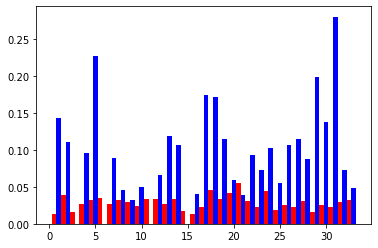

In [170]:
def get_mean_reviews(df, col):
    dfcp = df.copy()
    dfcp['Reviews'] = pd.to_numeric(dfcp['Reviews'])/dfcp['Minimum Number of Installs']
    mean = dfcp.groupby(col)['Reviews'].mean()
    return mean
# get_mean_reviews(df, 'Category')
# get_mean_reviews(df, 'Type')
# get_mean_reviews(df, 'Content Rating')

mean = get_mean_reviews(df, ['Category', 'Type'])
# review per install increases in paid apps except (social apps)
paid = []
free = []
cats = []
cats_inds = []
cats_inds2 = []
ind = 1
w = 0.5
for cat in df['Category'].unique():
    try:
        paid.append(mean.to_frame().query('Category == "{}" and Type == "Paid"'.format(cat))['Reviews'][0])
    except:
        paid.append(0)
    free.append(mean.to_frame().query('Category == "{}" and Type == "Free"'.format(cat))['Reviews'][0])
    cats.append(cat)
    cats_inds.append(ind)
    cats_inds2.append(ind-w)
    ind += 1
ax = plt.subplot(111)

ax.bar(cats_inds, paid, width=w, color='b', align='center')
ax.bar(cats_inds2, free, width=w, color='r', align='center')
ax.xticks(cats_inds, cats)
ax.autoscale(tight=True)

plt.show()

/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/wessam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


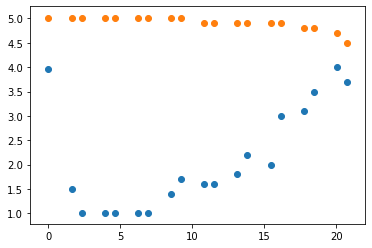

In [69]:
plt.scatter(np.log(df['Minimum Number of Installs']).unique(), df.groupby('Minimum Number of Installs')['Rating'].min())
plt.scatter(np.log(df['Minimum Number of Installs']).unique(), df.groupby('Minimum Number of Installs')['Rating'].max())
mins = df.groupby('Minimum Number of Installs')['Rating'].min()
maxs = df.groupby('Minimum Number of Installs')['Rating'].max()
insts = df.groupby('Minimum Number of Installs')['Minimum Number of Installs', 'Rating'].min()['Minimum Number of Installs']

plt.close()
plt.scatter(np.log(insts), mins)
plt.scatter(np.log(insts), maxs)


In [109]:
means = df.groupby(['Category','Type']).mean()
maxs = df.groupby(['Category','Type']).max()
counts = df.groupby(['Category','Type']).count()

In [106]:
means[means['Price ($)'] > 100]

,,Rating,Minimum Number of Installs,Price ($)
Category,Type,,,
EVENTS,Paid,4.435556,1.000000,109.990000
FINANCE,Paid,3.897780,10917.764706,170.637059
LIFESTYLE,Paid,4.241373,62058.421053,124.256316


In [108]:
maxs[maxs['Price ($)'] > 100]['Price ($)']

Category      Type
EVENTS        Paid    109.99
FAMILY        Paid    399.99
FINANCE       Paid    399.99
LIFESTYLE     Paid    400.00
MEDICAL       Paid    200.00
PRODUCTIVITY  Paid    154.99
Name: Price ($), dtype: float64

In [130]:
pd.to_numeric(df['Reviews']).max()
df['Reviews'].max()

'9992'